# Assignment 1

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# displaying .png images
from IPython.display import Image

In [2]:
# turn on pretty printing
# %pprint

## 1. Consider the undirected network defined by the following set of links:

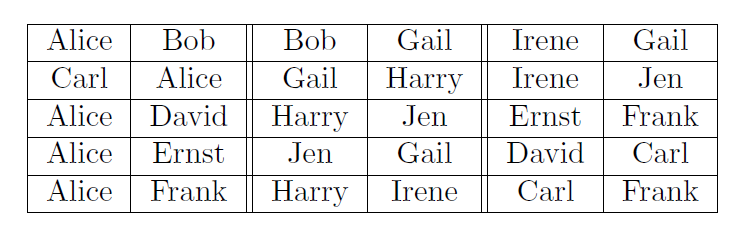

In [3]:
Image('data/network.png')

In [4]:
# creating network instance using networkx module
network_df = pd.read_csv('data/network.csv')

network = nx.Graph()

# filing the network
network.add_edges_from(network_df.values)

### (a) Draw the network by hand.

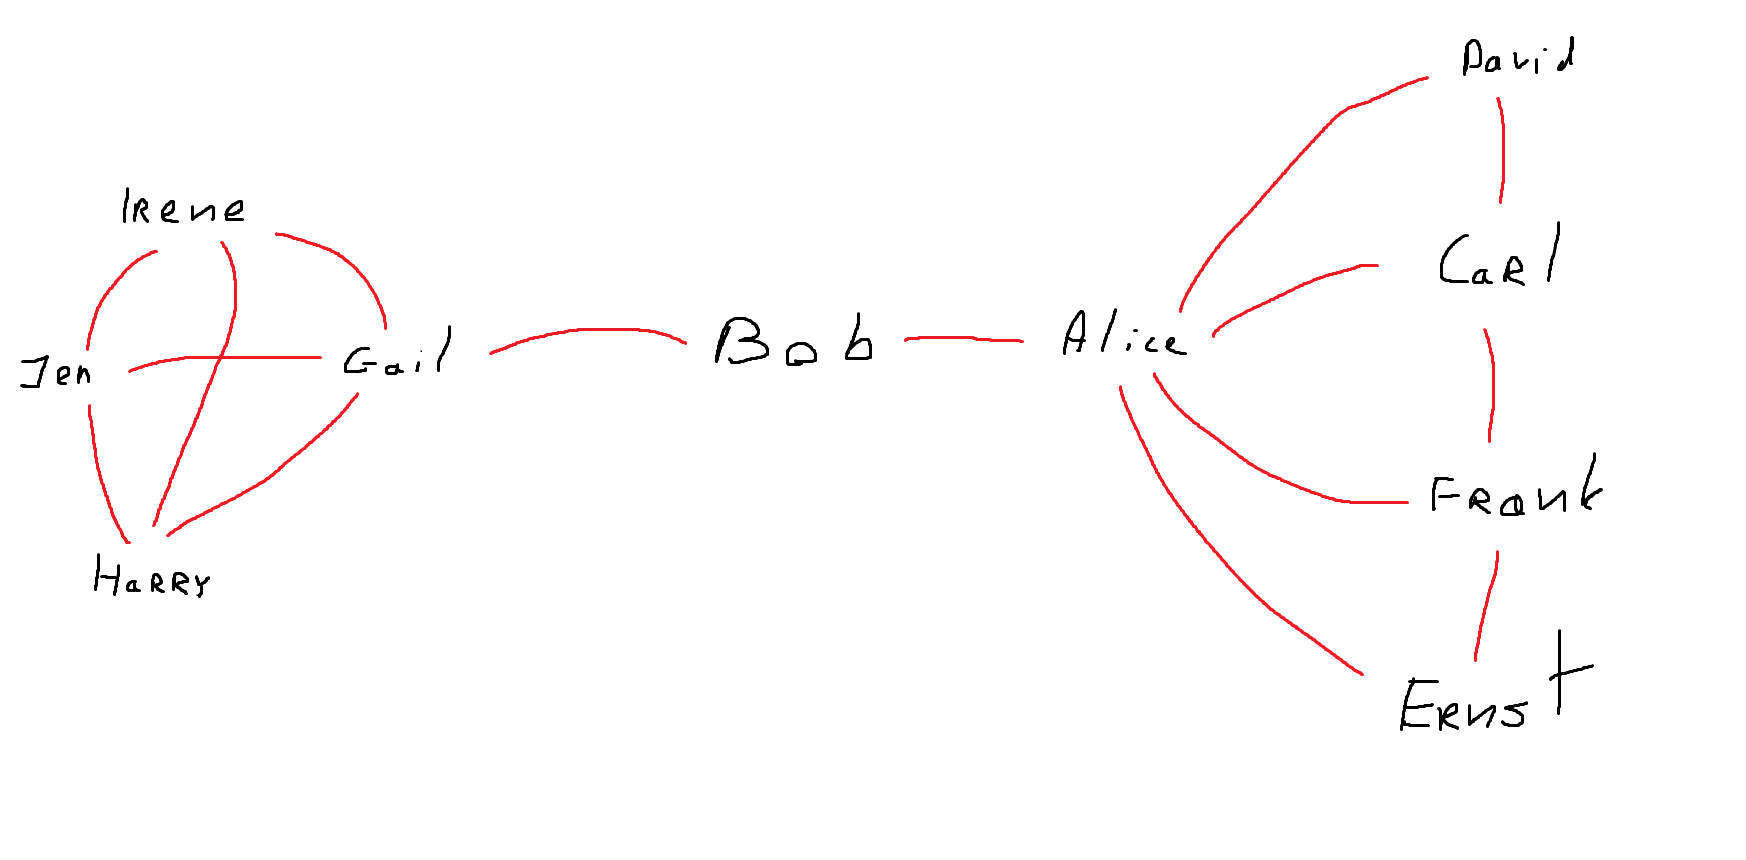

In [5]:
Image('data/network_by_hand.png')

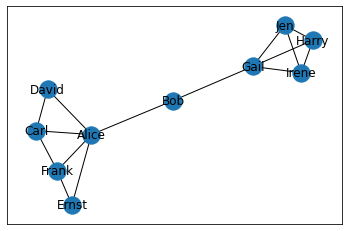

In [6]:
# using Python
nx.draw_networkx(network)

### (b) How many nodes are there?

answer: _10_

In [7]:
# using Python
len(network)

10

### (c) What is the density of the network?

\'# $k$' stands for 'number of $k$'

$\text{density} = \frac{\text{# actual connections}}{\text{# potential connections}} = \frac{15}{\frac{10 * 9}{2}} = \frac{15}{45} = \frac{1}{3}$

In [8]:
# using Python
nx.density(network)

0.3333333333333333

### (d) Calculate the degree of each node. Who is the most central node according to this measure?

In [9]:
nx.degree(network)

DegreeView({'Alice': 5, 'Bob': 2, 'Carl': 3, 'David': 2, 'Ernst': 2, 'Frank': 3, 'Gail': 4, 'Harry': 3, 'Jen': 3, 'Irene': 3})

### (e) Calculate the clustering of each node and the average clustering of the network.

Clusterring coefficient of a node: $C_i = \frac{2 L_i}{k_i (k_i-1)}$

where

$k_i$ - degree of node $i$.

$L_i$ - number of edges between the neighbours of node $i$.
    
ex. Carl has $k_i = 3$ neighbours with $L_i = 2$ connections between them.

$C_i = \frac{2 L_i}{k_i (k_i-1)} = \frac{2 \cdot 2}{3 \cdot 2} = \frac{2}{3}$


In [10]:
# clastering
clustering_dict = nx.clustering(network)
clustering_dict

{'Alice': 0.3,
 'Bob': 0,
 'Carl': 0.6666666666666666,
 'David': 1.0,
 'Ernst': 1.0,
 'Frank': 0.6666666666666666,
 'Gail': 0.5,
 'Harry': 1.0,
 'Jen': 1.0,
 'Irene': 1.0}

In [11]:
# avg clastering 

np.mean(list(clustering_dict.values()))

0.7133333333333333

### (f) Calculate the closeness centrality for each node. Who is the most central node according to this measure?

the formula:

$C(x) = \frac{n - 1}{\sum_{y \neq x} d(x, y)}$

where 

$n$ is the number of nodes in the network.

$d(x, y)$ is the shortest distance between x and y

ex. Carl

$C(Carl) = 9 / \left( d(Carl,Alice) + d(Carl,Bob) + \dots \right) = 9 / \left( 1 + 2 + 1 + 2 + 1 + 3 + 4 + 4 + 4 \right) = \frac{9}{22}$

In [12]:
#  ofc it's easier in Python
nx.closeness_centrality(network)

{'Alice': 0.5625,
 'Bob': 0.5625,
 'Carl': 0.4090909090909091,
 'David': 0.391304347826087,
 'Ernst': 0.391304347826087,
 'Frank': 0.4090909090909091,
 'Gail': 0.5,
 'Harry': 0.375,
 'Jen': 0.375,
 'Irene': 0.375}

Bob and Alice are both the most central nodes

### (g) Calculate the betweenness centrality of each node. Who is the most central node according to this measure?

the formula (from prof. Szawbiński lecture):

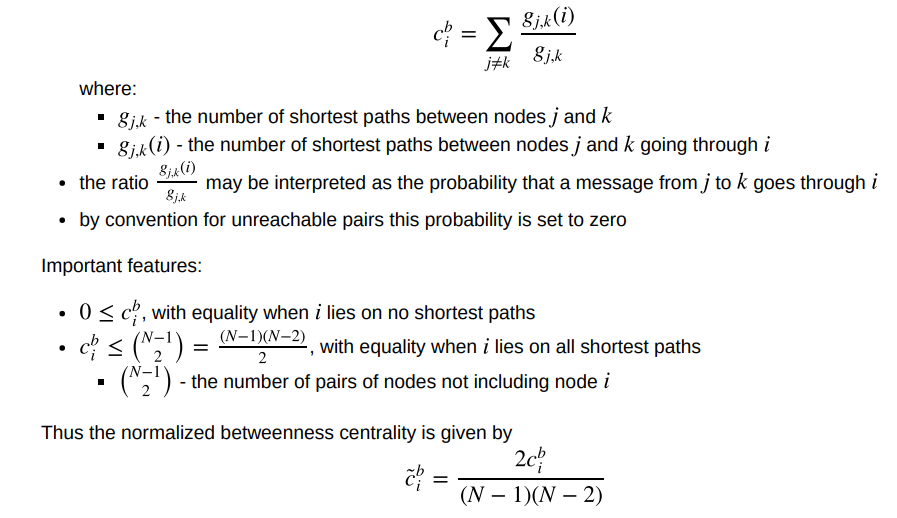

In [13]:
Image('data/betweenness_centrality.png')

In [14]:
# normalized
nx.betweenness_centrality(network)

{'Alice': 0.611111111111111,
 'Bob': 0.5555555555555556,
 'Carl': 0.013888888888888888,
 'David': 0.0,
 'Ernst': 0.0,
 'Frank': 0.013888888888888888,
 'Gail': 0.5,
 'Harry': 0.0,
 'Jen': 0.0,
 'Irene': 0.0}

In [15]:
# not normalized
nx.betweenness_centrality(network,normalized=False)

{'Alice': 22.0,
 'Bob': 20.0,
 'Carl': 0.5,
 'David': 0.0,
 'Ernst': 0.0,
 'Frank': 0.5,
 'Gail': 18.0,
 'Harry': 0.0,
 'Jen': 0.0,
 'Irene': 0.0}

Alice is the most central node

## 2. For the above network:
#### (a) prepare a CSV file with the edge list;
already done before.
#### (b) visualize the network by making use of the Gephi software;


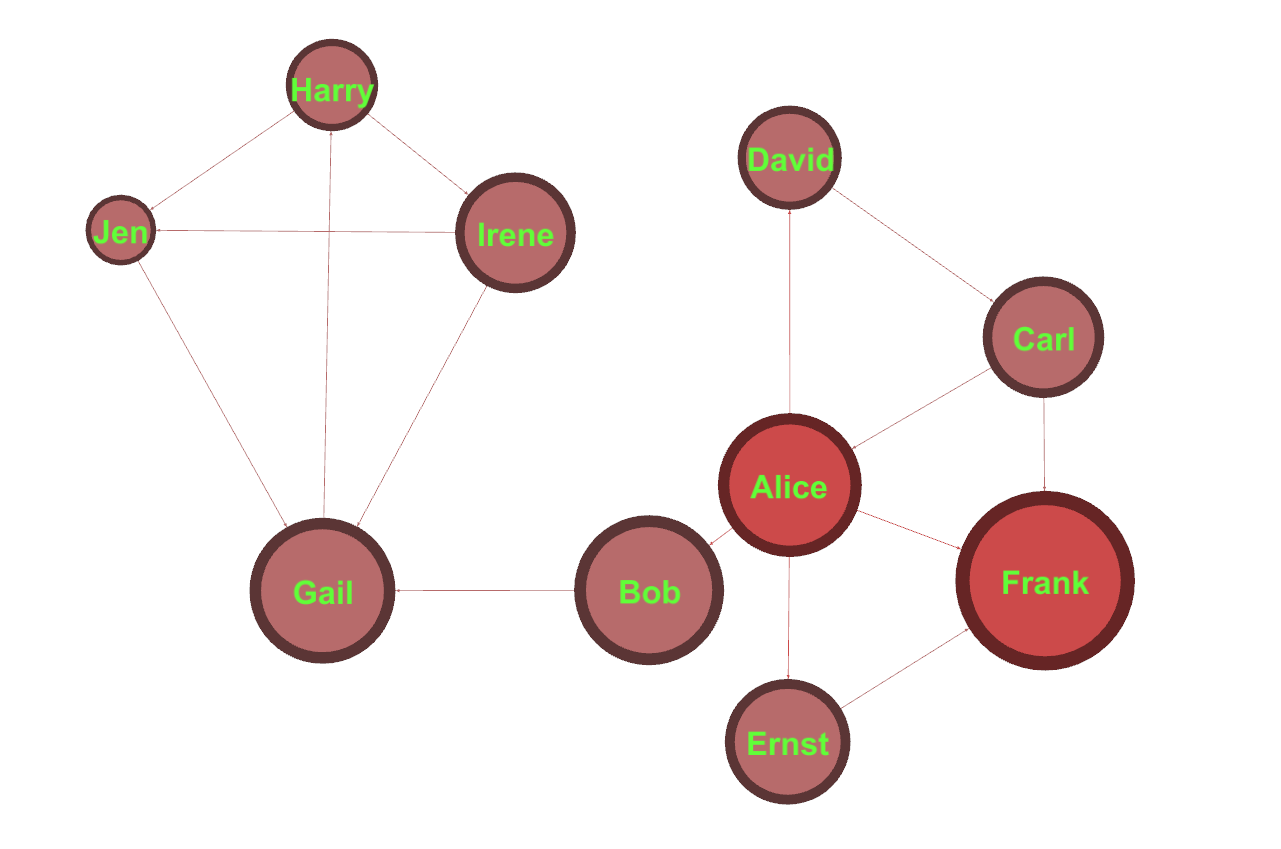

In [16]:
Image('data/graph_gephi.png')

### (c) calculate the basic network measures within Gephi.

I'm not going to add there all distributions done by Gephi. There are some of them and calculated averages on the right.

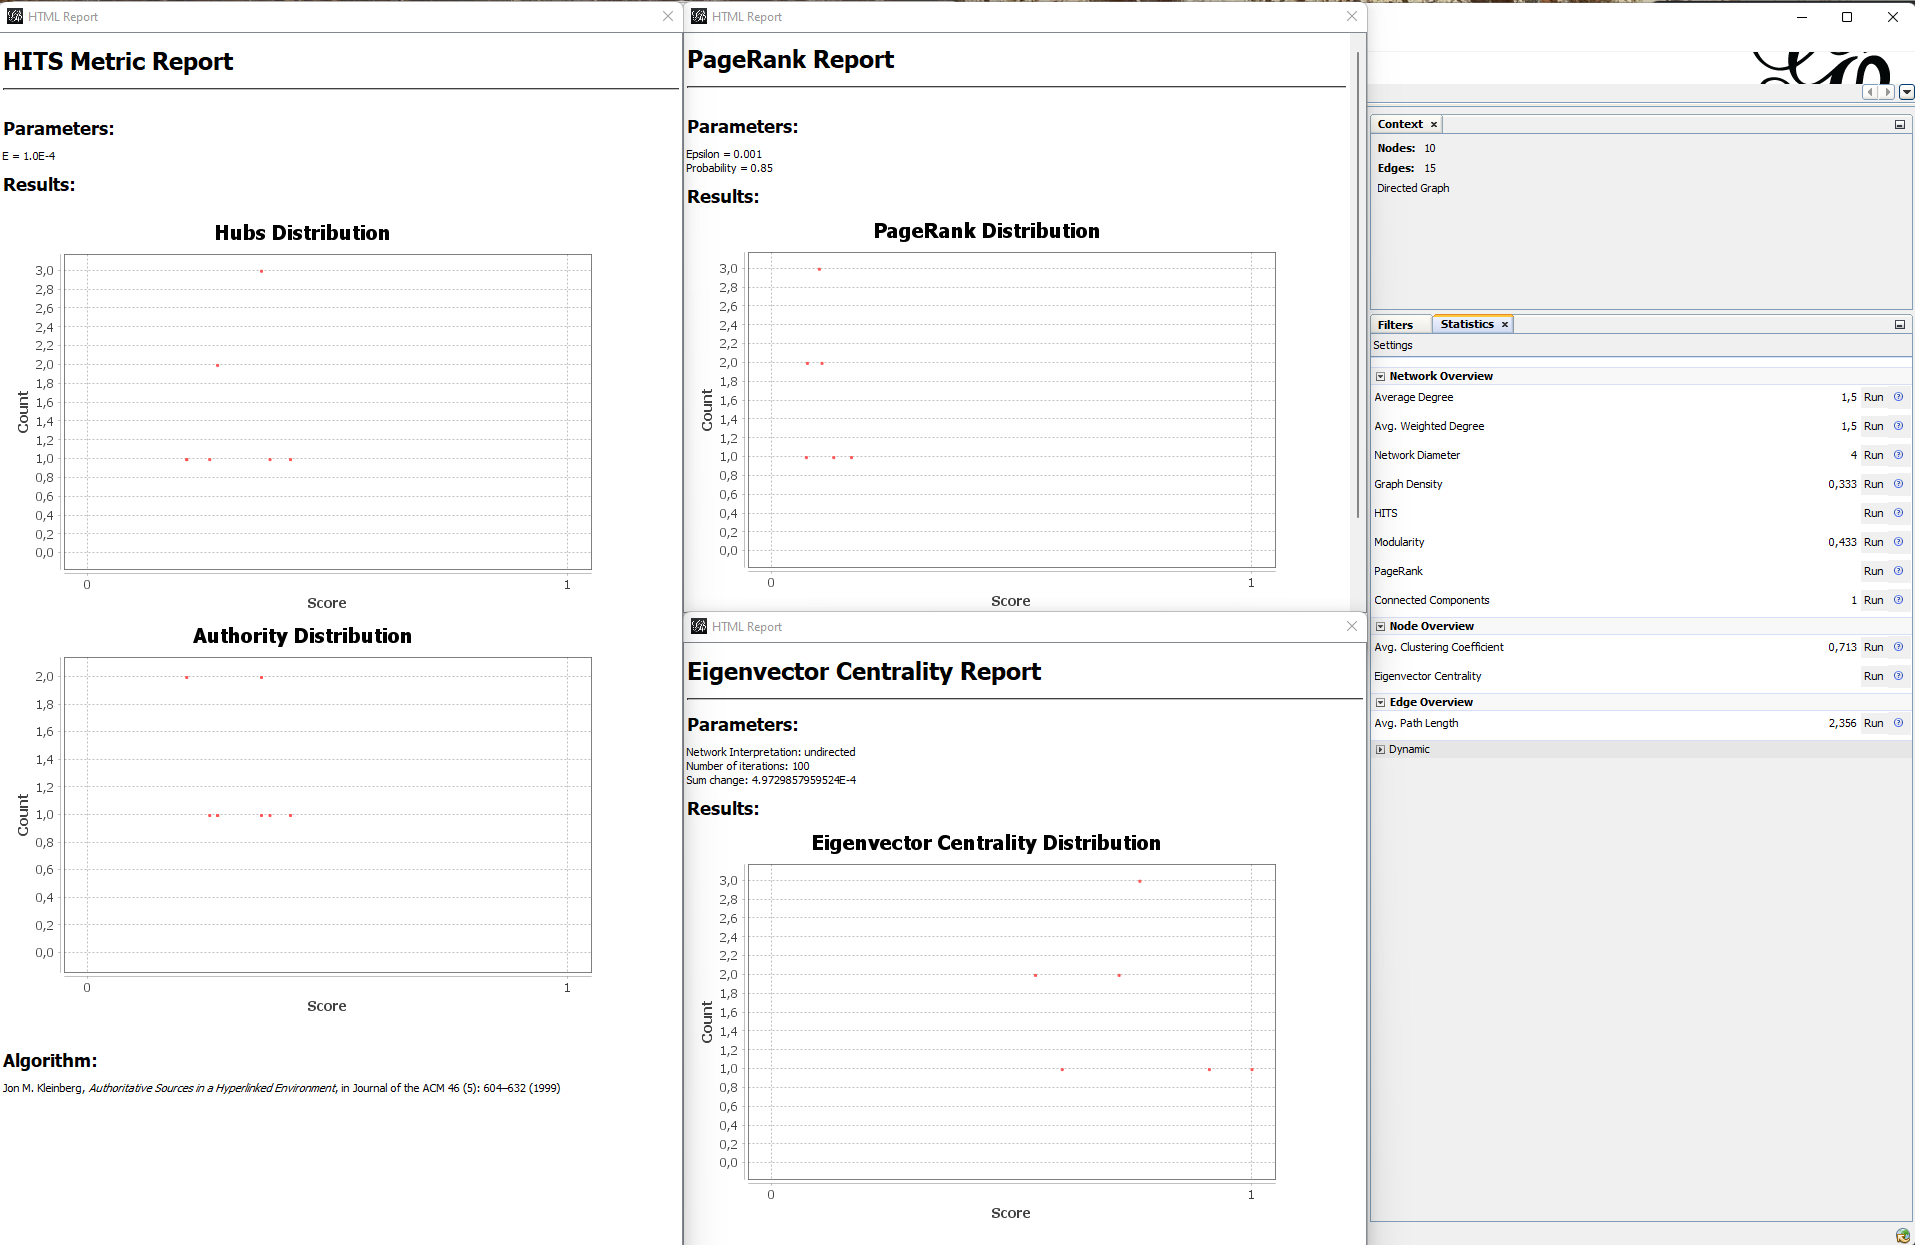

In [17]:
Image('data/gephi_measures.png')

# Exercise 3
An undirected unweighted network of size $N$ may be represented through a symmetric adjacency matrix $A \in R^{N×N}$ , which has $a_{ij} = 1$, if nodes $i$ and $j$ are connected, and $a_{ij} = 0$ otherwise. We assume that $a_{ii} = 0$, so there are no self-loops in the network.


Let $e$ be a column vector of $N$ elements all equal to 1, i.e. $e = (1, 1, . . . , 1)^T$,
where the superscript $T$ indicates the transposition.


Write expressions for or answer each of the following by making use of the
above quantities and the matrix formalism (no sum symbol $\sum$ allowed!):

In [18]:
# define A and e from above
A = nx.adjacency_matrix(network).toarray()
A

C:\Users\piotr\AppData\Local\Temp\ipykernel_13368\3533083606.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(network).toarray()


array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0]], dtype=int32)

In [19]:
e = np.ones(10).transpose()
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### (a) the vector k whose elements are the degrees $k_i$ of the nodes $i = 1, 2, 3, \cdot, N$;
$k= Ae$

In [20]:
# k = A x e
k = np.matmul(A,e)
k

array([5., 2., 3., 2., 2., 3., 4., 3., 3., 3.])

#### (b) the total number $L$ of links in the network;
$L = \frac{e^T  A  e}{2}$

In [21]:
# we do e^T X k once again
L = np.matmul(e.transpose(),k) / 2
L

15.0

#### (c) the matrix $N$ whose element $n_{ij}$ is equal to the number of common neighbors of nodes $i$ and $j$;

$ N = A^2 $

In [22]:
N = np.matmul(A, A)
N

array([[5, 0, 2, 1, 1, 2, 1, 0, 0, 0],
       [0, 2, 1, 1, 1, 1, 0, 1, 1, 1],
       [2, 1, 3, 1, 2, 1, 0, 0, 0, 0],
       [1, 1, 1, 2, 1, 2, 0, 0, 0, 0],
       [1, 1, 2, 1, 2, 1, 0, 0, 0, 0],
       [2, 1, 1, 2, 1, 3, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 4, 2, 2, 2],
       [0, 1, 0, 0, 0, 0, 2, 3, 2, 2],
       [0, 1, 0, 0, 0, 0, 2, 2, 3, 2],
       [0, 1, 0, 0, 0, 0, 2, 2, 2, 3]], dtype=int32)

#### (d) find the number $T$ of traingles present in the network.
$T = \frac{tr(A^3)}{6}$

In [23]:
T=np.trace(np.linalg.matrix_power(A, 3)) / 6
T

7.0

#### (e) how would you determine whether the network is connected only by looking at the adjacency matrix?
1. to check if there is only 1 not connected node - just check if (a) or diagonal of (c) contains any 0.

In general:

If you put all 1 on the diagonal of your adjacency matrix $A$, and all edge weights are positive then when you multiply $A^2$ you get a non-zero entry $a_{ij}$ in $A^2$ if and only if there exist non-zero $a_{ik}$ and $a_{kj}$ in $A$ for some $k$, i.e. there is a path of length 2 between $i$ and $j$ if $k \neq j$ and $k \neq i$ and there is a path of length 1 if $k=j$ or $k=i$. So the non-zero entries in $A^2$ tell you all pairs of nodes that are connected by a path of length 2.

Similarly the entries in $A^k$ tell you all pairs of nodes that are connected by a path of length $k$. So if you start with $A$ and keep squaring until you get Ak where $k \geq n$ where n is the number of nodes, then the non-zero entries in row $i$ tell you all the nodes that are connected to node $i$ (since two connected nodes must be connected by a path of length $n$ or less). So if you have a row in $A^k$ that is all non-zero, then the graph is connected. If the graph is not connected, you can similarly tell the connected components from the rows of  $A^k$

i have it from:
https://math.stackexchange.com/questions/864604/checking-connectivity-of-adjacency-matrix

example:

In [24]:
def square_until_k_geq_n(matrix: np.matrix) -> np.matrix:
    """ function doing exactly what is written in the cell above after "in general:".
    Args:
        matrix (np.matrix): adjacency matrix
    returns:
        (np.matrix)
    """
    k = 2
    n = len(matrix)
    matrix_wt_ones_on_diagonal = matrix + np.eye(n)

    mtx_squared = np.linalg.matrix_power(matrix_wt_ones_on_diagonal, k)
    while k < n:
        k = k ** 2
        mtx_squared = np.linalg.matrix_power(mtx_squared, k)

    return mtx_squared

In [25]:
# A_with_ones_on_diagonal = A + np.eye(len(A))
#
# np.linalg.matrix_power(A_with_ones_on_diagonal , 2)
square_until_k_geq_n(A)

array([[3.19215035e+78, 2.12601709e+78, 2.26833873e+78, 1.72401632e+78,
        1.72401632e+78, 2.26833873e+78, 3.54259826e+78, 3.03248969e+78,
        3.03248969e+78, 3.03248969e+78],
       [2.12601709e+78, 1.41839524e+78, 1.51027352e+78, 1.14790317e+78,
        1.14790317e+78, 1.51027352e+78, 2.36722749e+78, 2.02690816e+78,
        2.02690816e+78, 2.02690816e+78],
       [2.26833873e+78, 1.51027352e+78, 1.61197055e+78, 1.22514539e+78,
        1.22514539e+78, 1.61197055e+78, 2.51585504e+78, 2.15348469e+78,
        2.15348469e+78, 2.15348469e+78],
       [1.72401632e+78, 1.14790317e+78, 1.22514539e+78, 9.31147563e+77,
        9.31147563e+77, 1.22514539e+78, 1.91227429e+78, 1.63685005e+78,
        1.63685005e+78, 1.63685005e+78],
       [1.72401632e+78, 1.14790317e+78, 1.22514539e+78, 9.31147563e+77,
        9.31147563e+77, 1.22514539e+78, 1.91227429e+78, 1.63685005e+78,
        1.63685005e+78, 1.63685005e+78],
       [2.26833873e+78, 1.51027352e+78, 1.61197055e+78, 1.22514539e+78,
   

As we can see, there are no zeros - network is connected.

Now try with different network.

C:\Users\piotr\AppData\Local\Temp\ipykernel_13368\280792950.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = nx.adjacency_matrix(network).toarray()


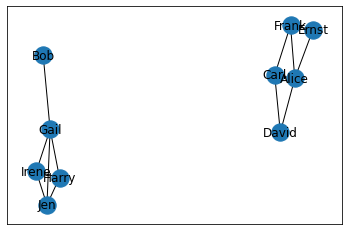

In [26]:
# delete connection between Bob and Alice and create new network
new_network_df=network_df.drop([0],axis=0)

network = nx.Graph()
network.add_edges_from(new_network_df.values)
B = nx.adjacency_matrix(network).toarray()
nx.draw_networkx(network)

In [27]:
square_until_k_geq_n(B)

array([[3.18532661e+75, 3.78905437e+75, 2.37592974e+75, 2.37592974e+75,
        3.18532661e+75, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.78905437e+75, 4.50720908e+75, 2.82624926e+75, 2.82624926e+75,
        3.78905437e+75, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.37592974e+75, 2.82624926e+75, 1.77220198e+75, 1.77220198e+75,
        2.37592974e+75, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.37592974e+75, 2.82624926e+75, 1.77220198e+75, 1.77220198e+75,
        2.37592974e+75, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.18532661e+75, 3.78905437e+75, 2.37592974e+75, 2.37592974e+75,
        3.18532661e+75, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

As we can see, there are some 0 - network is not connected.